e:\Program Files\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26410 (\N{CJK UNIFIED IDEOGRAPH-672A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Program Files\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38405 (\N{CJK UNIFIED IDEOGRAPH-9605}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Program Files\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35835 (\N{CJK UNIFIED IDEOGRAPH-8BFB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Program Files\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37096 (\N{CJK UNIFIED IDEOGRAPH-90E8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Program Files\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_fig

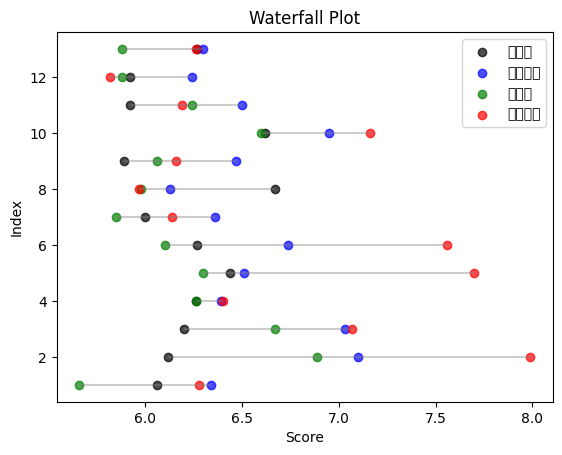

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Your data
data = {
    'index': [11, 7, 6, 8, 10, 12, 0, 3, 2, 9, 5, 4, 1],
    1.0: [5.92, 6.67, 6.00, 5.89, 5.92, 6.27, 6.06, 6.26, 6.20, 6.62, 6.27, 6.44, 6.12],
    2.0: [6.24, 6.13, 6.36, 6.47, 6.50, 6.30, 6.34, 6.39, 7.03, 6.95, 6.74, 6.51, 7.10],
    3.0: [5.88, 5.98, 5.85, 6.06, 6.24, 5.88, 5.66, 6.26, 6.67, 6.60, 6.10, 6.30, 6.89],
    4.0: [5.82, 5.97, 6.14, 6.16, 6.19, 6.26, 6.28, 6.40, 7.07, 7.16, 7.56, 7.70, 7.99]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by the 'index' column
ordered_df = df.sort_values('index')

# Create a waterfall plot
my_range = range(1, len(ordered_df.index) + 1)
xmin_values = ordered_df.iloc[:, 1:].min(axis=1)
xmax_values = ordered_df.iloc[:, 1:].max(axis=1)

plt.hlines(y=my_range, xmin=xmin_values, xmax=xmax_values, color='grey', alpha=0.4)
plt.scatter(ordered_df[1.0], my_range, color='black', alpha=0.7, label='未阅读')
plt.scatter(ordered_df[2.0], my_range, color='blue', alpha=0.7, label='部分阅读')
plt.scatter(ordered_df[3.0], my_range, color='green', alpha=0.7, label='已阅读')
plt.scatter(ordered_df[4.0], my_range, color='red', alpha=0.7, label='多次阅读')

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Index')
plt.title('Waterfall Plot')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [8]:
import pandas as pd
import scipy.stats as stats

# 多组示例数据
data = {
    'group1': [23, 21, 18, 25, 27, 29, 30, 28, 26, 24],
    'group2': [31, 29, 28, 35, 32, 30, 33, 28, 30, 34],
    'group3': [27, 25, 24, 29, 31, 30, 32, 28, 26, 30],
    # Add more groups as needed
}

# 存储结果的列表
results = []

# 循环进行多个独立样本 t 检验
alpha = 0.05
for group_name, group_data in data.items():
    for other_group_name, other_group_data in data.items():
        if group_name != other_group_name:
            t_statistic, p_value = stats.ttest_ind(group_data, other_group_data)
            
            # 判断显著性并添加到结果列表
            if p_value < alpha:
                significance = '显著差异'
            else:
                significance = '差异不显著'
                
            results.append({
                'Group 1': group_name,
                'Group 2': other_group_name,
                'T-statistic': t_statistic,
                'P-value': p_value,
                'Significance': significance
            })

# 创建 DataFrame
results_df = pd.DataFrame(results)

# 显示整理后的表格
print(results_df)


  Group 1 Group 2  T-statistic   P-value Significance
0  group1  group2    -4.184736  0.000557         显著差异
1  group1  group3    -2.142038  0.046116         显著差异
2  group2  group1     4.184736  0.000557         显著差异
3  group2  group3     2.449490  0.024770         显著差异
4  group3  group1     2.142038  0.046116         显著差异
5  group3  group2    -2.449490  0.024770         显著差异
